<a href="https://colab.research.google.com/github/carlosmding/academicProject/blob/main/EDA_Reingresos_NCSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerías usadas en el Proyectos**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno

**1. Conectar a Drive y cargar del dataset**

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
path=  "/content/drive/MyDrive/PracticaAcademica_CarlosPinto/BD SagradoCorazon.csv"
datos = pd.read_csv(path, sep=",")
df =datos.copy()

<ipython-input-47-82e1bcbc8af3>:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(path, sep=",")


**2. Visualizando el dataset**

In [48]:
#Apariencia de la tabla de datos
df.head()

,HospitalID,Hospital,Año,Mes,HistoriaClinica,Episodio,Sexo,GrupoEtario,Edad,Charlson,...,Tiempo_Quirurgico_Total,Reingreso_Dias,Reingreso_Rangos,Ind_Reing_7_dias,Ind_Reing_15_dias,Ind_Reing_30_dias,Ind_Compl_Aten_Med,Ind_Inf_Nosoc,Ind_Mort,Ind_Event_Adv_Rel_Med
0,302,Clínica Sagrado Corazón,2023,5,5175134,1,M,18 años – 30 años,22,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Clínica Sagrado Corazón,2023,5,32413158,1,F,71 años – 80 años,77,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,302,Clínica Sagrado Corazón,2023,2,1042459939,2,F,18 años – 30 años,24,0,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302,Clínica Sagrado Corazón,2023,5,8037874,12,M,71 años – 80 años,79,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302,Clínica Sagrado Corazón,2023,5,3344754,5,M,Mayor de 81 años,85,2,...,0.0,15.0,15 dias,NaN,SI,NaN,NaN,NaN,NaN,NaN


In [49]:
#Número de muestras (filas) y caracteristicas incluyendo variable de salida (columnas)
df.shape

(31095, 44)

**3. Exploración descriptiva del dataset**

In [50]:
# Tipos de cada columna y cantidad de nulos
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31095 entries, 0 to 31094
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HospitalID               31095 non-null  int64  
 1   Hospital                 31095 non-null  object 
 2   Año                      31095 non-null  int64  
 3   Mes                      31095 non-null  int64  
 4   HistoriaClinica          31095 non-null  object 
 5   Episodio                 31095 non-null  object 
 6   Sexo                     31095 non-null  object 
 7   GrupoEtario              31095 non-null  object 
 8   Edad                     31095 non-null  int64  
 9   Charlson                 31095 non-null  int64  
 10  FechaIngreso             31095 non-null  object 
 11  FechaEgreso              31095 non-null  object 
 12  TipoIngreso              31095 non-null  object 
 13  TipoAlta                 31095 non-null  object 
 14  ReingresoDias         

**Variables Categóricas**
1. **Hospital**: es el nombre de la insititución, todo los 31095 registros tiene la misma información
2. **Episodio**: es un consecutivo de los ingresos hospitalarios del paciente
3. **Sexo**
4. **Grupo etáreo**: grupo al que pertencen en cluster según el ciclo vital
5. **Fecha de ingreso**
6. **Fecha de alta**
7. **Tipo de alta**: diferentes modalidades en las que se pudo presentar el alta
8. **GRDCodigo**: código del Grupo Relacionado de Diagnóstico al que pertenece el egreso
9. **GRDDescripcion**: descripcrión del GRD al que pertenence
10. **PagadorID**: código asociado a entidad responsable de pago
11. **NombrePagador**: nombre del la entidad responsable de pago
12. **Severidad**: clasificación de severidad según presencia de complicaciones o comorbilidades
13. **RiesgoMorbilidad**: clasificación del riesgo de morbilidad como probabilidad de estancia prolongada
14. **VMI**: clasificación de uso de ventilación mecánica
15. **RiesgoMortalidad**: clasificación del riesgo de mortalidad según índice de Charlson y edad.
16. **DxCodigo**: código CIE-10 del diagnóstico principal
17. **DxDescripcion**: descripción del diagnóstico principal
18. **Especialidad**: nombre de la especialidad tratante
19. **ReingresoRangos**: clasificación de reingreso en 3 rangos (7, 15 y 30 dias)


**Variables Numéricas**
1. **HospitalID**: es el ID de la institución
2. **Año**: año de la atención
3. **Mes**: mes de la atención
4. **Edad**: edad en años
5. **Charlson**: índice de Charlson (morbilidad)
6. **ReingresosDias**: número de dias desde la última hospitalización hasta el ingreso actual
7. **ValorFacturado**: valor en pesos del valor facturado por la hospitalización
8. **CostoCalculado**: valor en pesos del costo calculado por la atención
9. **CostoInformado**: valor en pesos del costo de la atención informado por la institución
10. **EstanciaMedia**: número de dias de hospitalización
11. **EstanciaPreoperatoria**: número de días desde el ingreso hasta la primera intervención quirúrgica (si tuvo algún procedimiento)
12. **CantidadDx**: número de diagnósticos asocidos al episodio hospitalario
13. **EspecialidadID**: ID de la especialidad tratante
14. **Multimorbilidad**: número de enfermedades crónicas
15. **Tiempo_quirurgico_total**: número de horas quirúrgicas reportadas
16. **Reingresos_Dias**: variable repetida de ReingresoDias

**Binarización de variables**
1. **Ind_Reing_7_dias**: indicador de reingreso a los 7 dias
2. **Ind_Reing_15_dias**: indicador de reingreso a los 15 dias
3. **Ind_Reing_30_dias**: indicador de reingreso a los 30 dias
4. **Ind_Compl_Aten_Med**: indicador de complicación asociada a la atención
5. **Ind_Inf_Nosoc**: indicador de infección asociada a la atención
6. **Ind_Mort**: indicador de mortalidad en la hospitalización
7. **Ind_Event_Adv_Rel_Med**: indicador de eventos relacionados con medicamentos en la atención

In [51]:
#Binarizaciónde 7 variables categóricas

var_binarizar = ['Ind_Reing_7_dias', 'Ind_Reing_15_dias', 'Ind_Reing_30_dias', 'Ind_Compl_Aten_Med',
                 'Ind_Inf_Nosoc', 'Ind_Mort', 'Ind_Event_Adv_Rel_Med']

df[var_binarizar] = df[var_binarizar].applymap(lambda x: 1 if not pd.isna(x) else 0)

In [52]:
#Cantidad de datos nulos por caracteristica
k = df.isna().sum()
k[k!=0]

ReingresoDias       23021
PagadorID             409
NombrePagador       12715
ValorFacturado        409
CostoCalculado        643
CostoInformado        643
DxCodigo               25
DxDescripcion          25
CantidadDx             11
EspecialidadID          9
Reingreso_Dias      23021
Reingreso_Rangos    29164
dtype: int64

<Axes: >

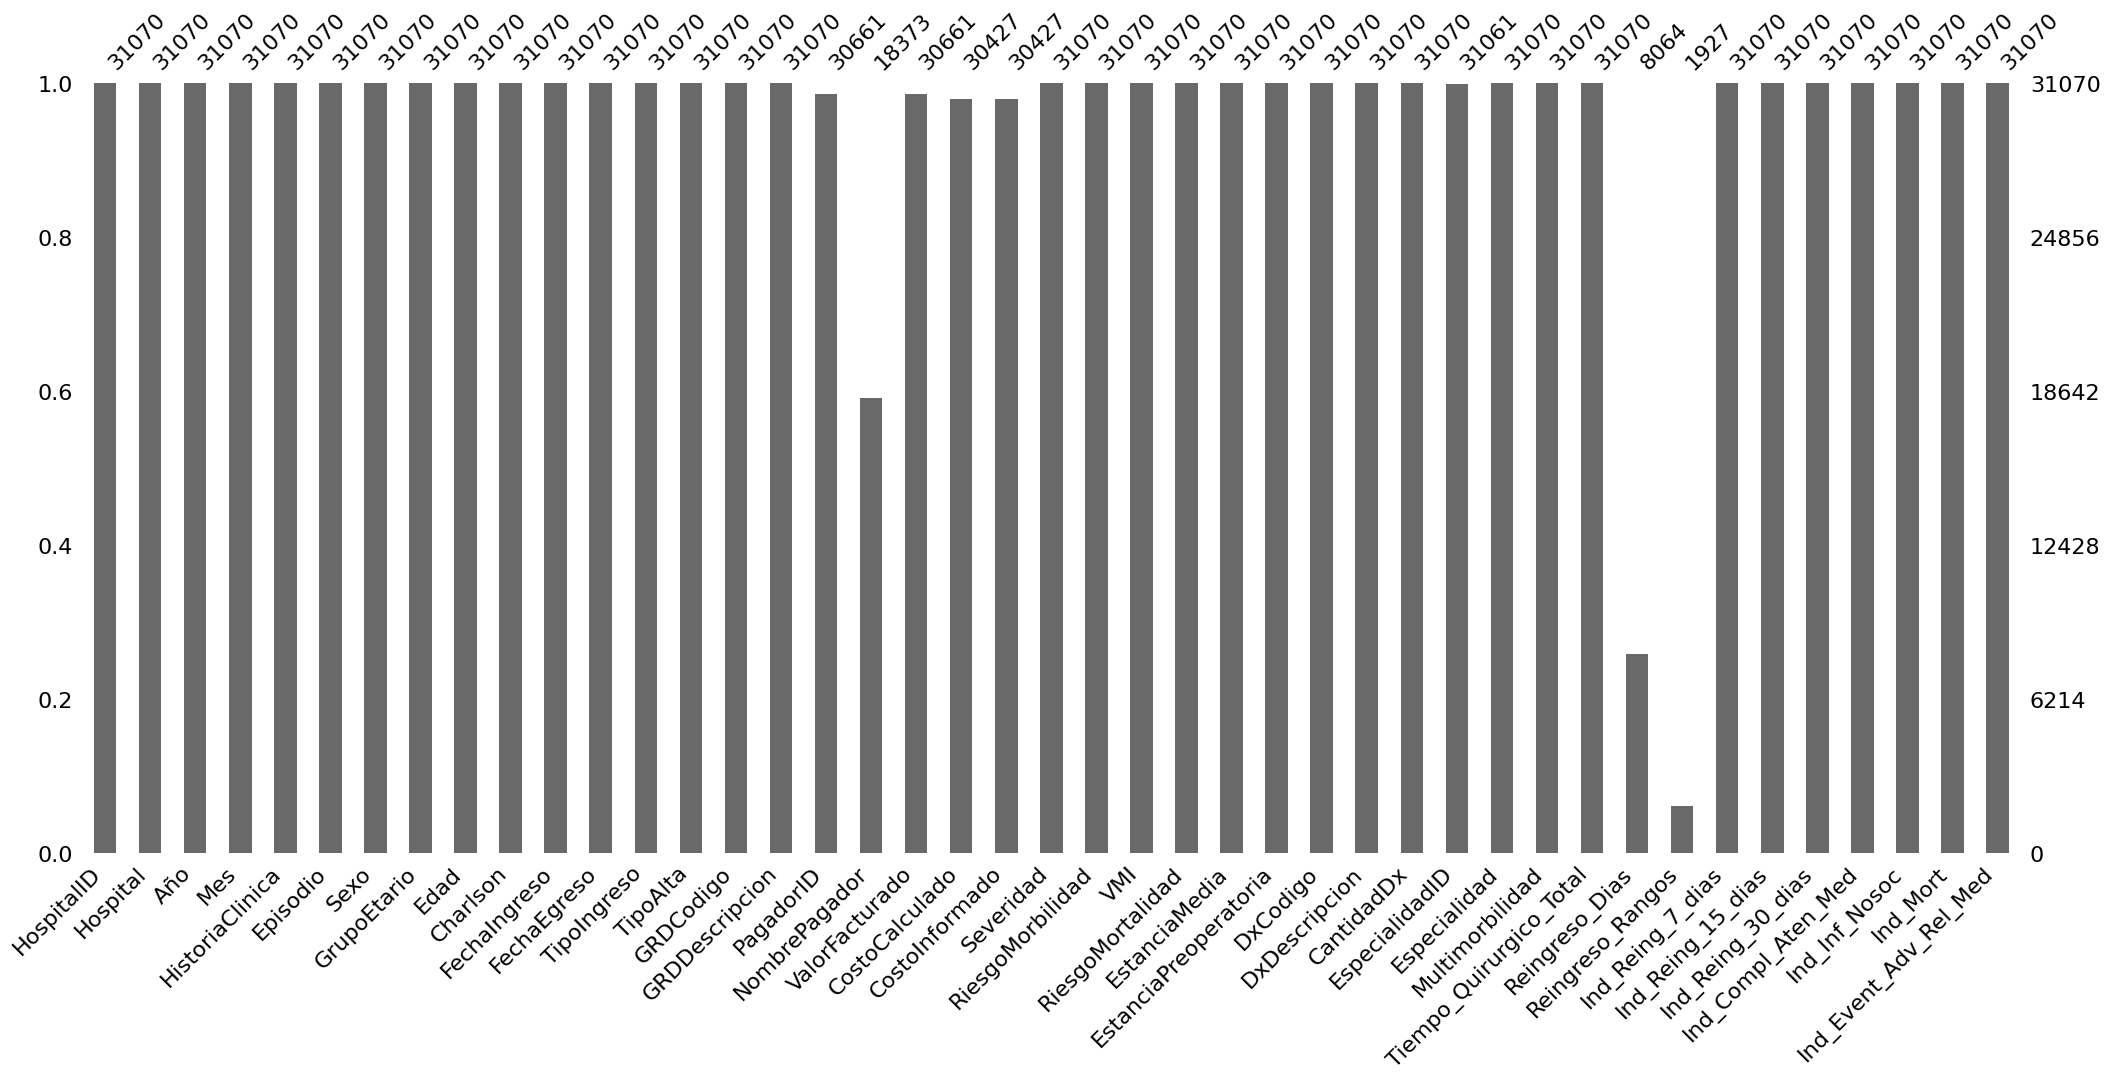

In [53]:
#ReingresoDias y Reingreso_Dias tiene la misma información por lo tanto se elimina la primera
df=df.drop(['ReingresoDias'], axis=1)

#DxCodigo y DxDescripcion tienen 25 registros sin datos, se eliminarán dado la impoartancia de esta variable
df=df.dropna(subset=['DxCodigo'])

#Visualización de datos nulos con librería missingno
msno.bar(df)

**Cambiar la variable de reingresos_rangos en 5 categorias, no reingreso, 7, 15, 30 y mayor a 30**

In [54]:
#Cantidad de datos nulos por caracteristica
k = df.isna().sum()
k[k!=0]

PagadorID             409
NombrePagador       12697
ValorFacturado        409
CostoCalculado        643
CostoInformado        643
EspecialidadID          9
Reingreso_Dias      23006
Reingreso_Rangos    29143
dtype: int64

**3.1 Descripción algunas variables numéricas**

In [55]:
df.describe()[['Edad','Charlson','EstanciaMedia','EstanciaPreoperatoria']]

,Edad,Charlson,EstanciaMedia,EstanciaPreoperatoria
count,31070.000000,31070.000000,31070.000000,31070.000000
mean,48.367782,0.716575,5.036788,0.704538
std,22.230564,1.325348,6.281382,2.421696
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,0.000000
50%,49.000000,0.000000,4.000000,0.000000
75%,66.000000,1.000000,6.000000,0.000000
max,104.000000,12.000000,124.000000,61.000000


<Axes: xlabel='Edad', ylabel='Count'>

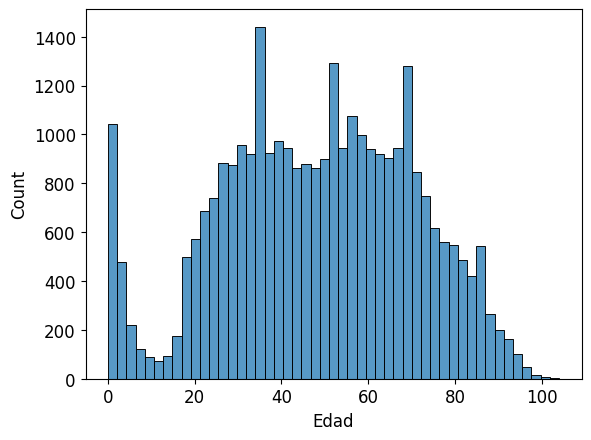

In [56]:
#Histograma de variable Edad
sns.histplot(data=df, x='Edad')

<Axes: ylabel='Número de diagnósticos CIE-10'>

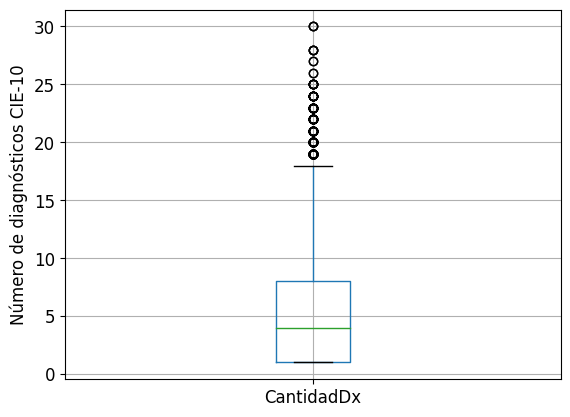

In [57]:
#Para visualizar distrubución de los datos, simetria y datos atipicos se usan boxplot para variables numéricas
df.boxplot(column="CantidadDx", ylabel="Número de diagnósticos CIE-10")

**3.2 Cuantificación de variables categóricas**

In [58]:
# Para contabilizar variables categóricas:
df["Reingreso_Rangos"].value_counts()

30 dias    777
7 dias     598
15 dias    552
Name: Reingreso_Rangos, dtype: int64

<Axes: title={'center': 'Distrubución por tipo de reingreso'}, ylabel='Reingreso_Rangos'>

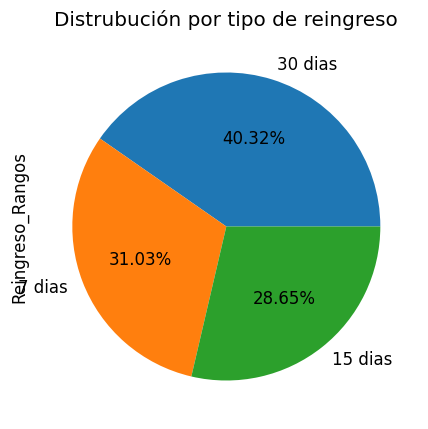

In [59]:
reingreso = df["Reingreso_Rangos"].value_counts()
reingreso.plot(kind = "pie", title="Distrubución por tipo de reingreso", autopct='%1.2f%%', figsize=(7,5))

In [60]:
#Cuántas categorías tienen las variables categóricas:
column_categ = df.select_dtypes(include=['object'])

for columna in column_categ.columns:
    cardinalidad = len(df[columna].unique())
    print(f"Variable '{columna}' tiene {cardinalidad} categorías únicas.")

Variable 'Hospital' tiene 1 categorías únicas.
Variable 'HistoriaClinica' tiene 27086 categorías únicas.
Variable 'Episodio' tiene 210 categorías únicas.
Variable 'Sexo' tiene 2 categorías únicas.
Variable 'GrupoEtario' tiene 13 categorías únicas.
Variable 'FechaIngreso' tiene 1771 categorías únicas.
Variable 'FechaEgreso' tiene 1743 categorías únicas.
Variable 'TipoIngreso' tiene 5 categorías únicas.
Variable 'TipoAlta' tiene 8 categorías únicas.
Variable 'GRDCodigo' tiene 224 categorías únicas.
Variable 'GRDDescripcion' tiene 224 categorías únicas.
Variable 'PagadorID' tiene 70 categorías únicas.
Variable 'NombrePagador' tiene 52 categorías únicas.
Variable 'Severidad' tiene 4 categorías únicas.
Variable 'RiesgoMorbilidad' tiene 3 categorías únicas.
Variable 'VMI' tiene 5 categorías únicas.
Variable 'RiesgoMortalidad' tiene 4 categorías únicas.
Variable 'DxCodigo' tiene 2014 categorías únicas.
Variable 'DxDescripcion' tiene 2003 categorías únicas.
Variable 'Especialidad' tiene 32 cat

In [61]:
cols = df.columns.values


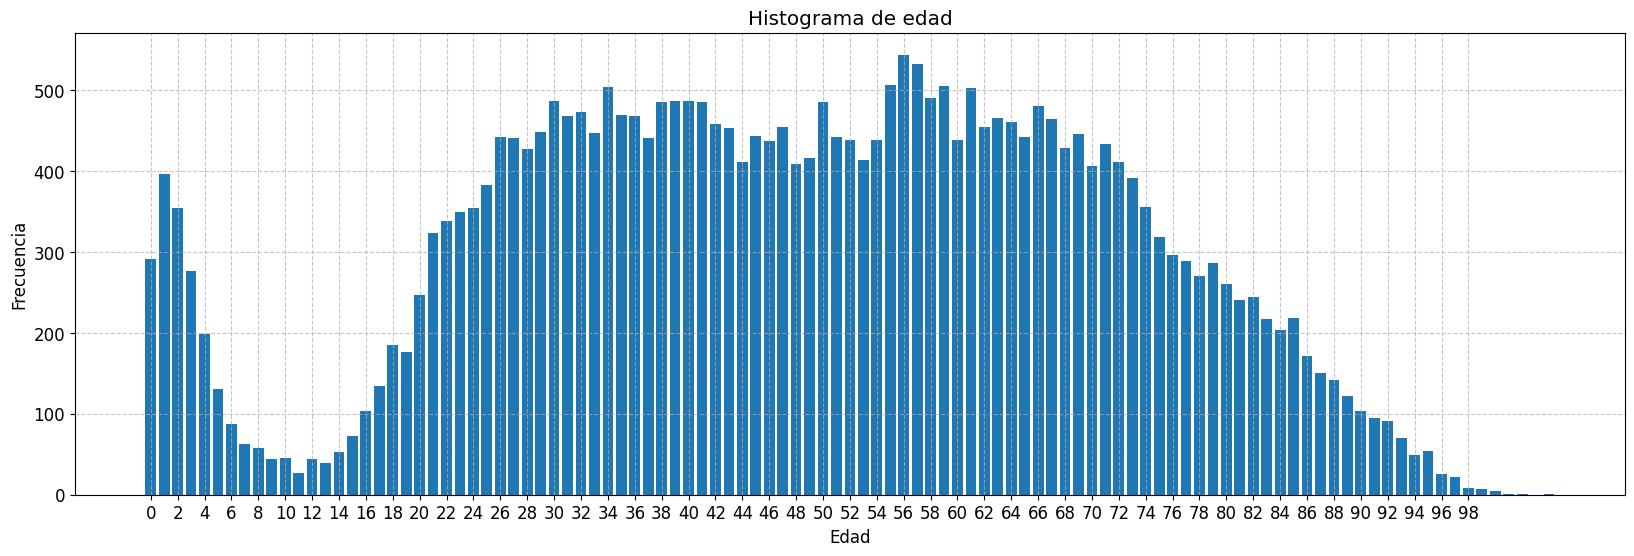

In [62]:
edad_egr = df['Edad'].value_counts()
Edades_tot = edad_egr.index
frecuencia_ed = edad_egr.values
plt.figure(figsize=(20, 6))
plt.bar(Edades_tot, frecuencia_ed)
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.xticks(range(0, 100, 2))
plt.yticks(range(0, 600, 100))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se observa una distribución muy homogenea desde los 30 a los 70 años

In [63]:
df['GrupoEtario'].value_counts()

51 años – 60 años     4750
31 años – 40 años     4729
18 años – 30 años     4604
61 años – 70 años     4554
41 años – 50 años     4452
71 años – 80 años     3313
Mayor de 81 años      2247
1 año – 3 años        1187
13 años – 17 años      403
7 años – 12 años       281
6 meses – 11 meses     224
4 años – 6 años        218
28 días – 5 meses      108
Name: GrupoEtario, dtype: int64

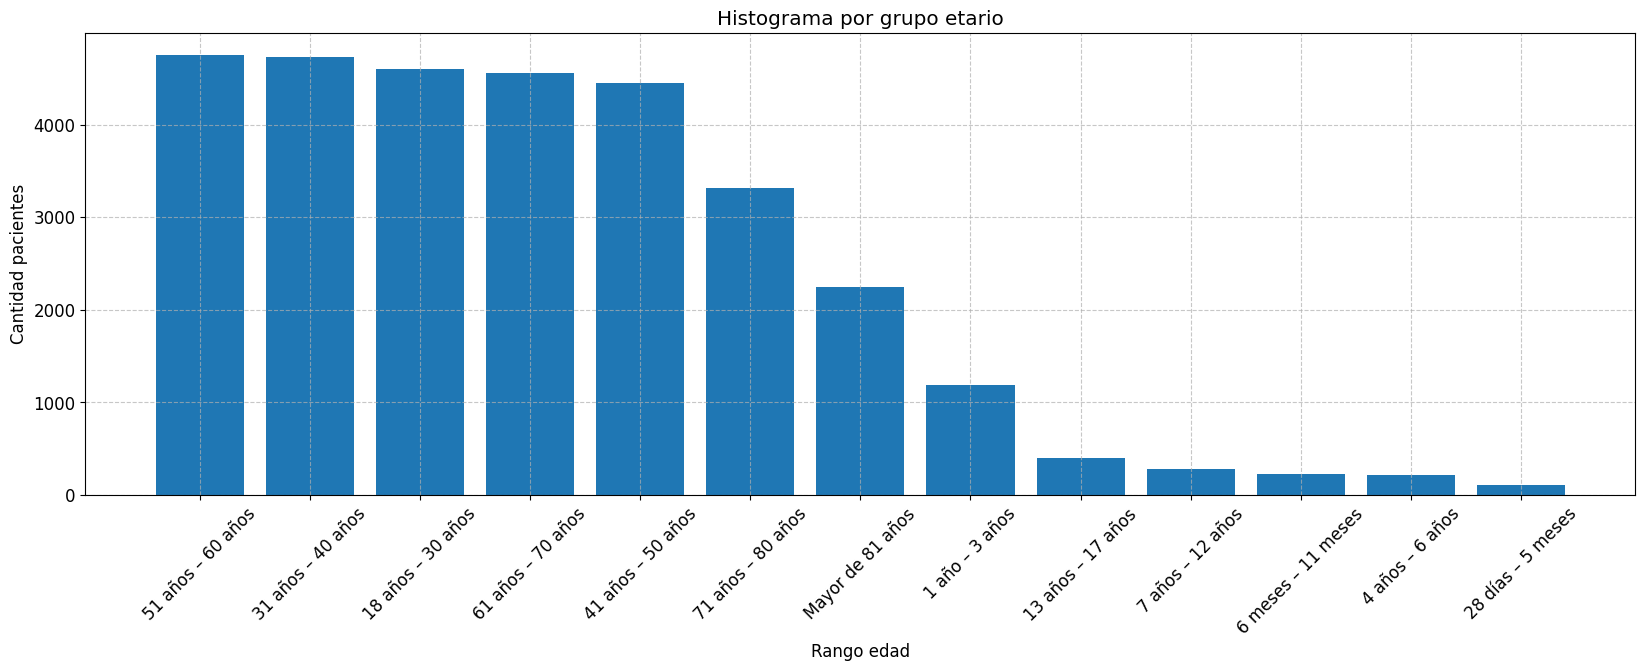

In [64]:
edad_counts = df['GrupoEtario'].value_counts()
Edades = edad_counts.index
frecuencia = edad_counts.values

plt.figure(figsize=(20, 6))
plt.bar(Edades, frecuencia)
plt.title('Histograma por grupo etario')
plt.xlabel('Rango edad')
plt.ylabel('Cantidad pacientes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Se confirma que que la distrubución de egresos hospitalarios es homogenea entre pacientes entre 18-70 años


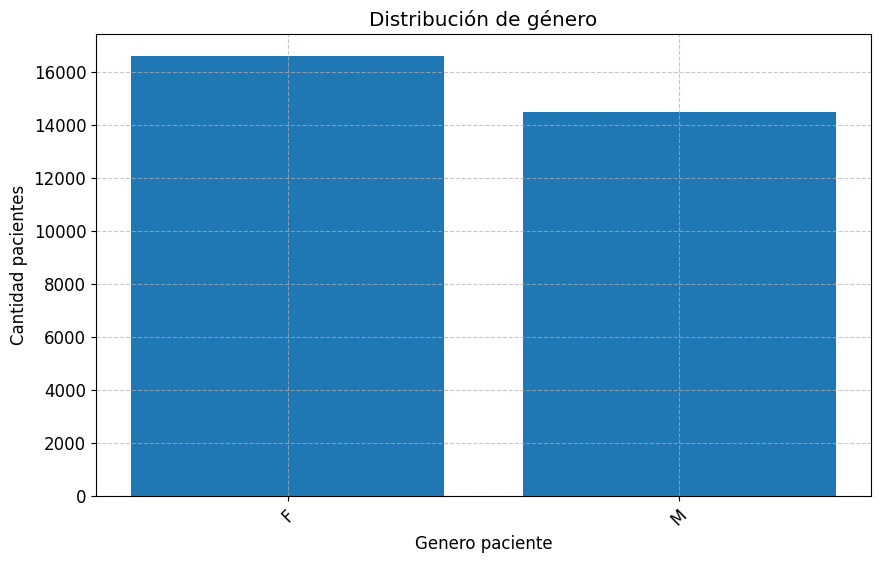

In [65]:
count_gener = df['Sexo'].value_counts()
genero = count_gener.index
frecuencia_gen = count_gener.values

plt.figure(figsize=(10, 6))
plt.bar(genero, frecuencia_gen)
plt.title('Distribución de género')
plt.xlabel('Genero paciente')
plt.ylabel('Cantidad pacientes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Año
2020    12895
2021     7401
2022     7022
2023     3752
Name: HistoriaClinica, dtype: int64


Text(0, 0.5, 'Número de pacientes')

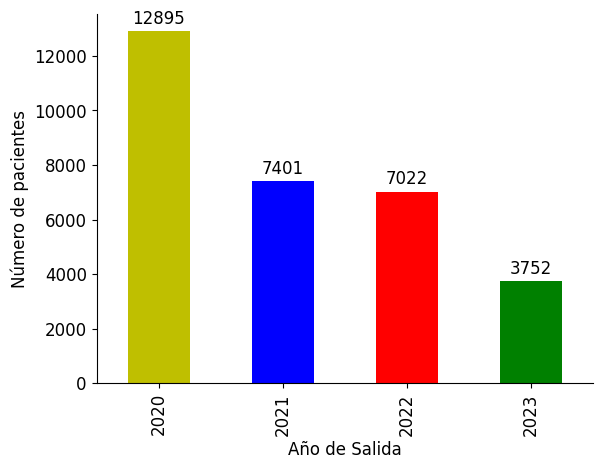

In [66]:
from itertools import cycle, islice
# número de muestras por año
samples_counts = df.groupby('Año')['HistoriaClinica'].count()
print(samples_counts)

# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['y', 'b', 'r', 'g', 'r', 'g', 'k']), None, len(samples_counts)))

splot=samples_counts.plot(kind='bar', stacked=False,  color=my_colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
# Hide the right and top spines
splot.spines[['right', 'top']].set_visible(False)
# Add title and axis names
plt.xlabel('Año de Salida')
plt.ylabel('Número de pacientes')

In [81]:
#Visualizando los 20 diagnósticos principales (codificados) que presentan mayor frecuencia:
diagn_princ = df['DxCodigo'].value_counts()
print(diagn_princ.head(20))


#New dataframe with 15 dx
df2 = df[(df['DxCodigo']  == 'U07.1') | (df['DxCodigo']  == 'N39.0') | (df['DxCodigo']  == 'K92.2') | (df['DxCodigo']  == 'K80.0') |\
                  (df['DxCodigo'] == 'N40') | (df['DxCodigo']  == 'D25.9') | (df['DxCodigo']  == 'Z30.0') | (df['DxCodigo']  == 'K40.0') |\
                  (df['DxCodigo']  == 'N39.9') | (df['DxCodigo']  == 'K35.9') | (df['DxCodigo']  == 'R10.4') | (df['DxCodigo']  == 'J18.9')| (df['DxCodigo']  == 'C85.9') | (df['DxCodigo']  == 'A09')| (df['DxCodigo']  == 'J44.1')]
print (df2.shape)


U07.1    2030
N39.0    1010
K92.2     962
K80.0     537
N40       505
D25.9     491
K80.8     422
Z30.0     400
K40.9     400
N93.9     389
K35.9     389
R10.4     373
J18.9     347
C85.9     332
A09       321
J44.1     318
K81.0     313
J15.9     303
K85       294
U07.2     294
Name: DxCodigo, dtype: int64
(8019, 43)


In [83]:
frec_diagn_ppal = df2.groupby(['DxDescripcion', 'DxCodigo']).size().reset_index(name='Frecuencia')
frec_diagn_ppal_ord = frec_diagn_ppal.sort_values(by='Frecuencia', ascending=False)
print(frec_diagn_ppal_ord)

                                        DxDescripcion DxCodigo  Frecuencia
2                        COVID-19, VIRUS IDENTIFICADO    U07.1        2030
9   INFECCIÓN DE VÍAS URINARIAS, SITIO NO ESPECIFI...    N39.0        1010
6        HEMORRAGIA GASTROINTESTINAL, NO ESPECIFICADA    K92.2         962
3   CÁLCULO DE LA VESÍCULA BILIAR CON COLECISTITIS...    K80.0         537
8                          HIPERPLASIA DE LA PRÓSTATA      N40         505
10       LEIOMIOMA DEL ÚTERO, SIN OTRA ESPECIFICACIÓN    D25.9         491
1   CONSEJO Y ASESORAMIENTO GENERAL SOBRE LA ANTIC...    Z30.0         400
0   APENDICITIS AGUDA (APENDICITIS AGUDA, NO ESPEC...    K35.9         389
13   OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS    R10.4         373
12  NEUMONÍA, ORGANISMO NO ESPECIFICADO (NEUMONÍA,...    J18.9         347
11  LINFOMA NO HODGKIN DE OTRO TIPO Y EL NO ESPECI...    C85.9         332
4   DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...      A09         321
5   ENFERMEDAD PULMONAR O

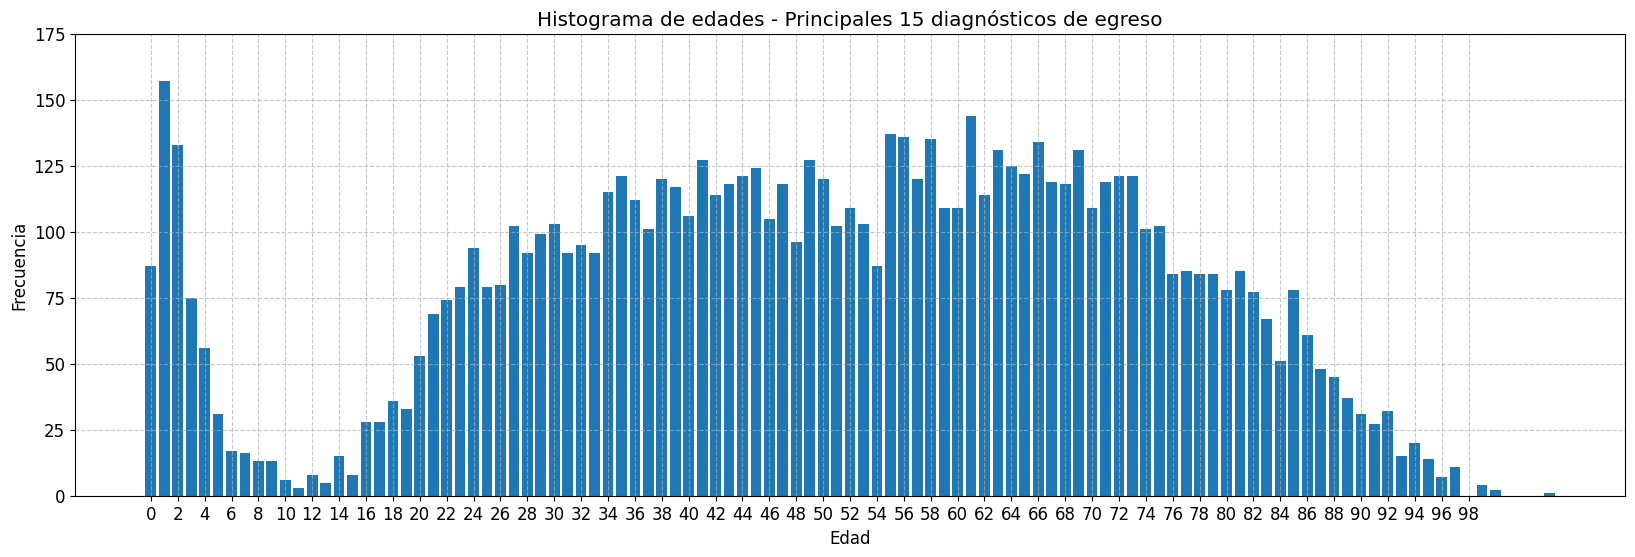

In [87]:
edad_egr = df2['Edad'].value_counts()
Edades_tot = edad_egr.index
frecuencia_ed = edad_egr.values
plt.figure(figsize=(20, 6))
plt.bar(Edades_tot, frecuencia_ed)
plt.title('Histograma de edades - Principales 15 diagnósticos de egreso')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.xticks(range(0, 100, 2))
plt.yticks(range(0, 180, 25))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [88]:
reingresos = df['Reingreso_Rangos'].value_counts()
print(reingresos)

30 dias    777
7 dias     598
15 dias    552
Name: Reingreso_Rangos, dtype: int64
